In [22]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [23]:
data = pd.read_csv('mcdonalds.csv')

In [24]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [25]:
data.shape

(1453, 15)

In [26]:
data.VisitFrequency.unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [27]:
data.isnull().sum()/data.shape[0]

yummy             0.0
convenient        0.0
spicy             0.0
fattening         0.0
greasy            0.0
fast              0.0
cheap             0.0
tasty             0.0
expensive         0.0
healthy           0.0
disgusting        0.0
Like              0.0
Age               0.0
VisitFrequency    0.0
Gender            0.0
dtype: float64

In [28]:
# we do not have any null value 

In [29]:
categorical_features = data.select_dtypes('O')

In [30]:
categorical_features

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,Every three months,Male


In [31]:
def LABEL_ENCODING(x):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[x]= label_encoder.fit_transform(data[x])
    data[x].unique()

In [32]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [33]:
LABEL_ENCODING("yummy")
LABEL_ENCODING("convenient")
LABEL_ENCODING("spicy")
LABEL_ENCODING("fattening")
LABEL_ENCODING("greasy")
LABEL_ENCODING("fast")
LABEL_ENCODING("cheap")
LABEL_ENCODING("tasty")
LABEL_ENCODING("expensive")
LABEL_ENCODING("healthy")
LABEL_ENCODING("disgusting")
LABEL_ENCODING("VisitFrequency")
LABEL_ENCODING("Like")
LABEL_ENCODING("Gender")
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1


In [34]:
data.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,-0.251600,-0.281653,-0.023896,-0.062545
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,-0.247663,-0.070597,-0.035920,-0.041402
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,0.022923,0.146217,-0.017184,0.051015
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.015972,-0.139254,0.005929,-0.059707
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,0.098425,-0.233554,0.007803,0.021801
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,-0.067114,-0.020558,0.011130,-0.049027
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,-0.057818,0.016958,0.032753,-0.116050
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,-0.287870,-0.194576,-0.023878,-0.044385
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,0.084583,-0.070851,-0.009614,0.144113
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,-0.024514,0.021366,-0.008230,-0.042455


In [35]:
data.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,4.636614,44.604955,2.637990,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.446175,14.221178,1.756057,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,57.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,71.000000,5.000000,1.000000


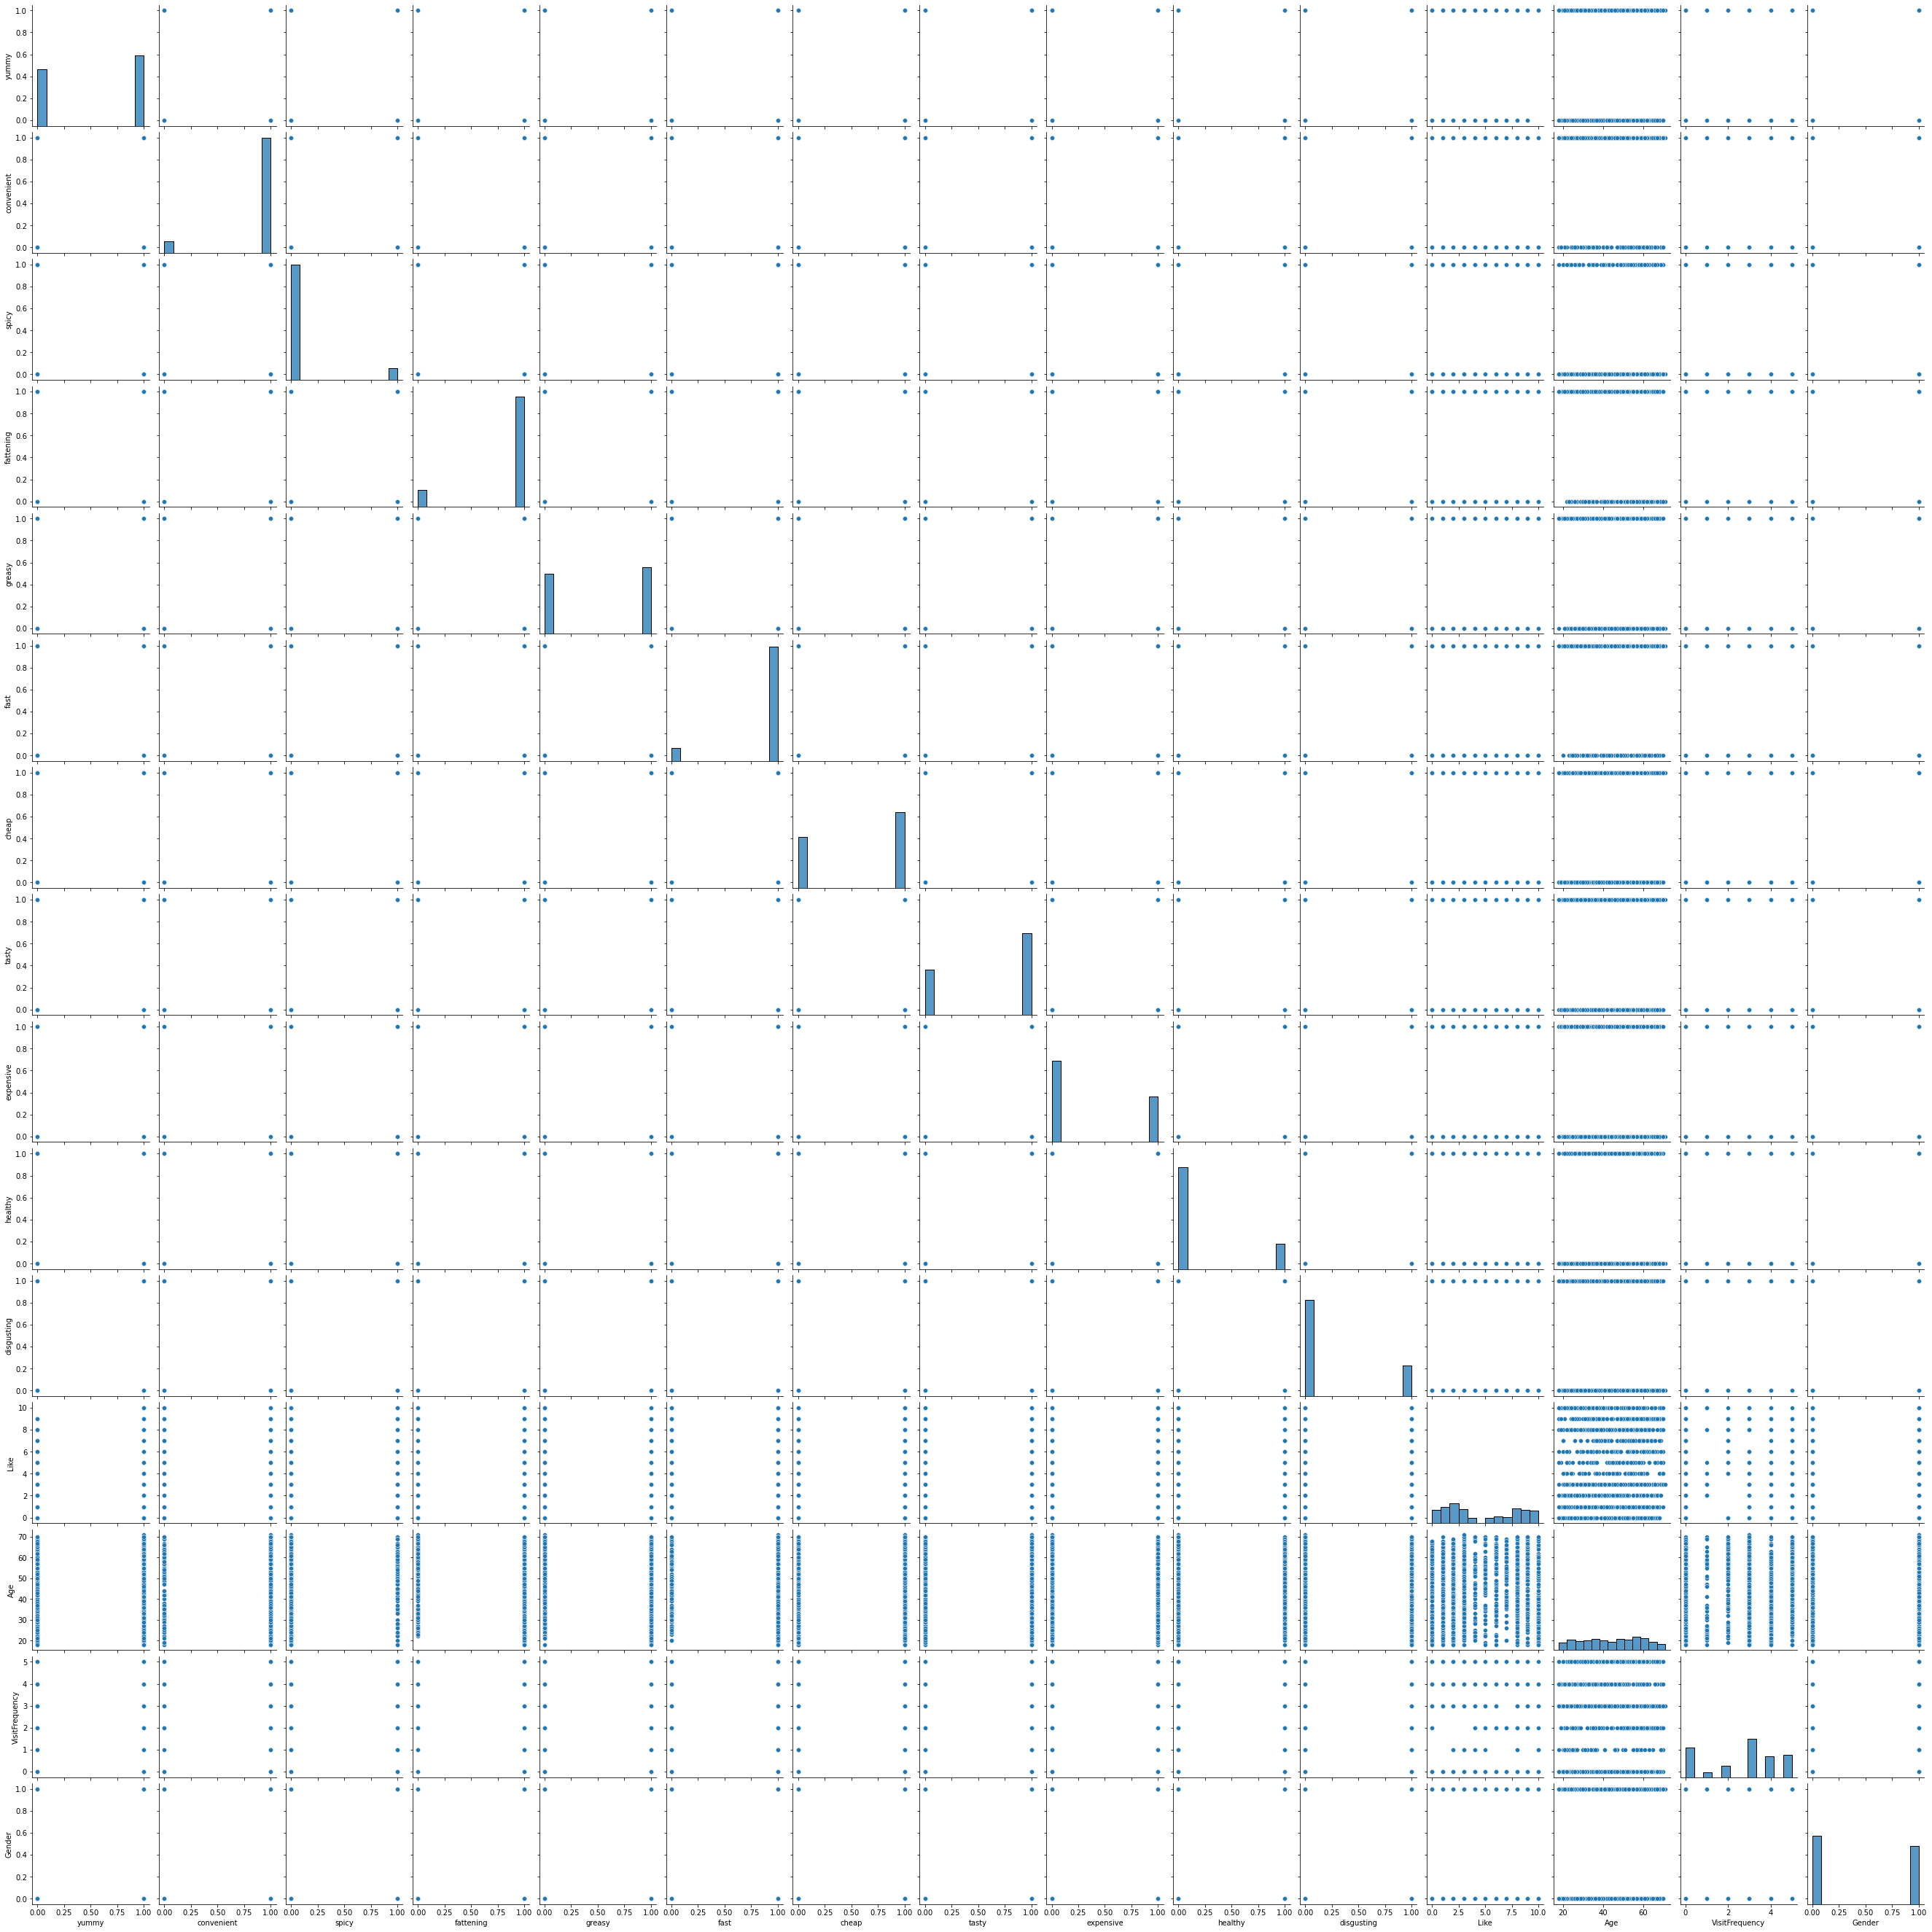

In [36]:
sns.pairplot(data)
plt.show()

<AxesSubplot:>

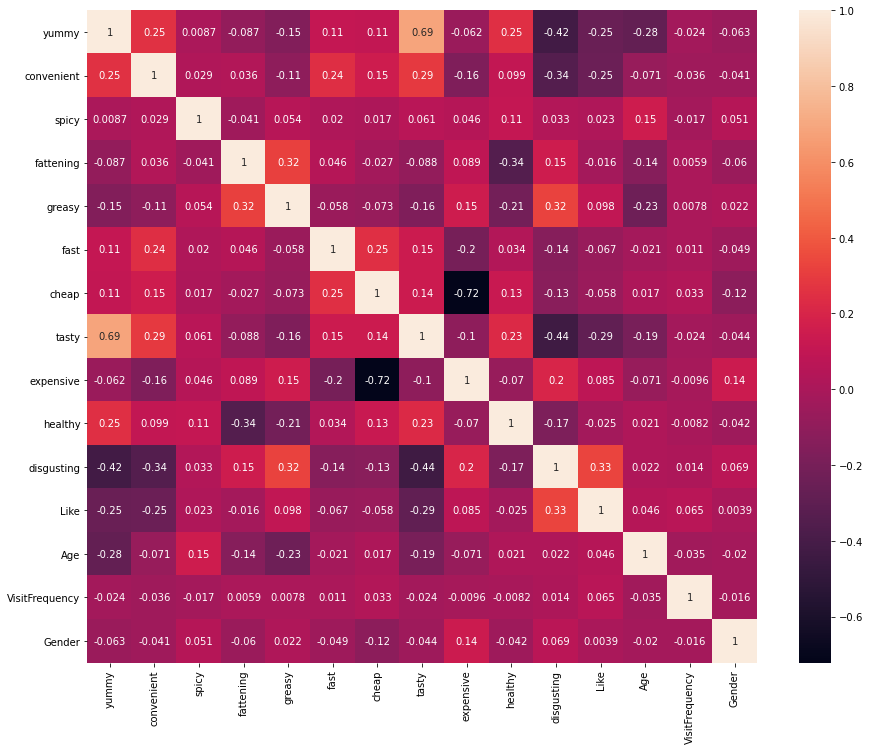

In [37]:
plt.figure(figsize=(15,12))
correlation = data.corr()
sns.heatmap(data.corr(), cbar=True, annot=True)

([<matplotlib.patches.Wedge at 0x23fcf171100>,
 [Text(-0.14583822733625953, 1.0902895080882957, 'Male'),
  Text(0.14583822733625992, -1.0902895080882955, 'Female')],
 [Text(-0.07954812400159611, 0.5947033680481612, '54.2%'),
  Text(0.0795481240015963, -0.5947033680481612, '45.8%')])

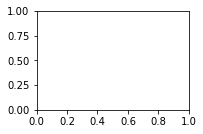

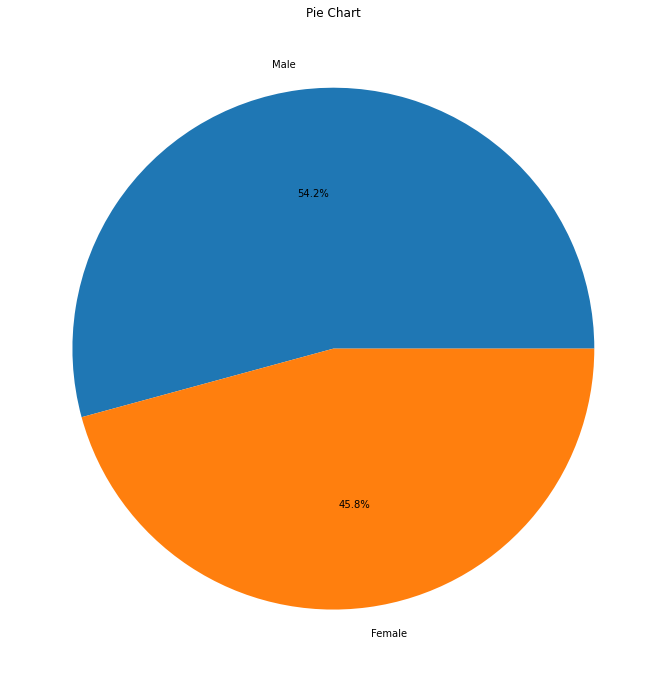

In [38]:
plt.subplot(221)
plt.figure(figsize=(16,12))
labels = ['Male','Female']
plt.title('Pie Chart')
plt.pie(data.Gender.value_counts(), labels = labels, autopct='%0.01f%%')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


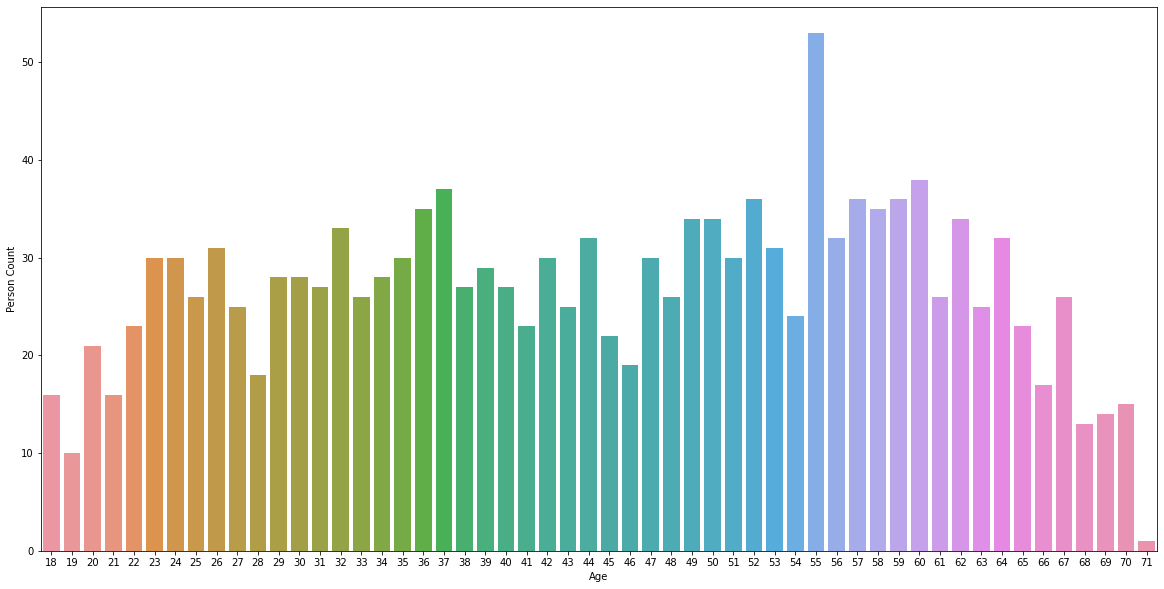

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(3)
kmeans

KMeans(n_clusters=3)

In [42]:
pred = kmeans.fit_predict(data)
pred

array([1, 2, 1, ..., 1, 2, 0])

In [43]:
data['K_means_Cluster'] = pred
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,K_means_Cluster
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,1
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,2


In [44]:
kmeans.cluster_centers_

array([[7.51121076e-01, 9.26008969e-01, 5.15695067e-02, 9.14798206e-01,
        6.92825112e-01, 9.12556054e-01, 6.25560538e-01, 7.71300448e-01,
        3.65470852e-01, 1.88340807e-01, 2.19730942e-01, 4.44394619e+00,
        2.73318386e+01, 2.76457399e+00, 4.61883408e-01],
       [4.24131627e-01, 8.90310786e-01, 1.40767824e-01, 8.19012797e-01,
        4.25959781e-01, 9.14076782e-01, 6.28884826e-01, 5.61243144e-01,
        2.94332724e-01, 2.02925046e-01, 2.43144424e-01, 4.85740402e+00,
        5.96910420e+01, 2.52650823e+00, 4.33272395e-01],
       [5.13043478e-01, 9.10869565e-01, 7.82608696e-02, 8.78260870e-01,
        4.84782609e-01, 8.71739130e-01, 5.36956522e-01, 6.19565217e-01,
        4.26086957e-01, 2.04347826e-01, 2.65217391e-01, 4.56086957e+00,
        4.34130435e+01, 2.64782609e+00, 4.82608696e-01]])

In [46]:
# now we will use elbow curve method to get the optimum number of cluster
ssd = list()
k = [i for i in range(1,10)]
for i in k : 
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    ssd.append(kmeans.inertia_)

In [47]:
ssd

[319422.5120440467,
 97528.38188307732,
 60172.0833939391,
 44715.38791314346,
 37856.900177134674,
 33643.433518757956,
 30417.314741513037,
 27504.25876923828,
 24623.221115254888]

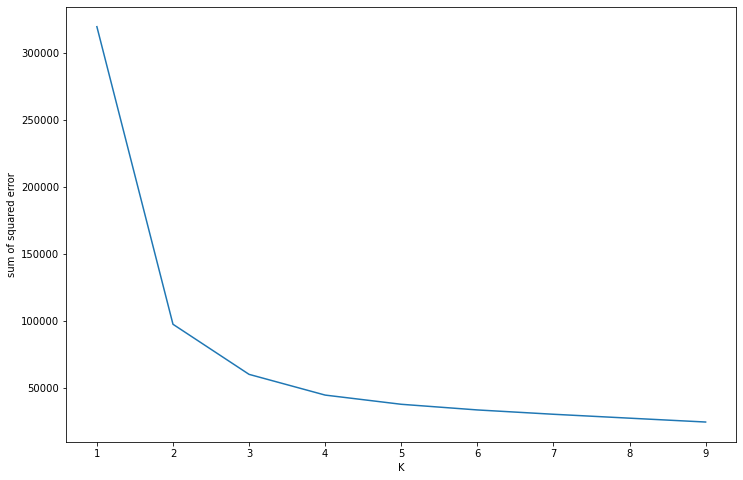

In [48]:
# elbow plot 

plt.figure(figsize=(12,8))
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k, ssd)

In [49]:
# From Elbow Method it is Clear that we have 3 Clusters

In [50]:
# Hierarchical Clustering 
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

In [51]:
points = data

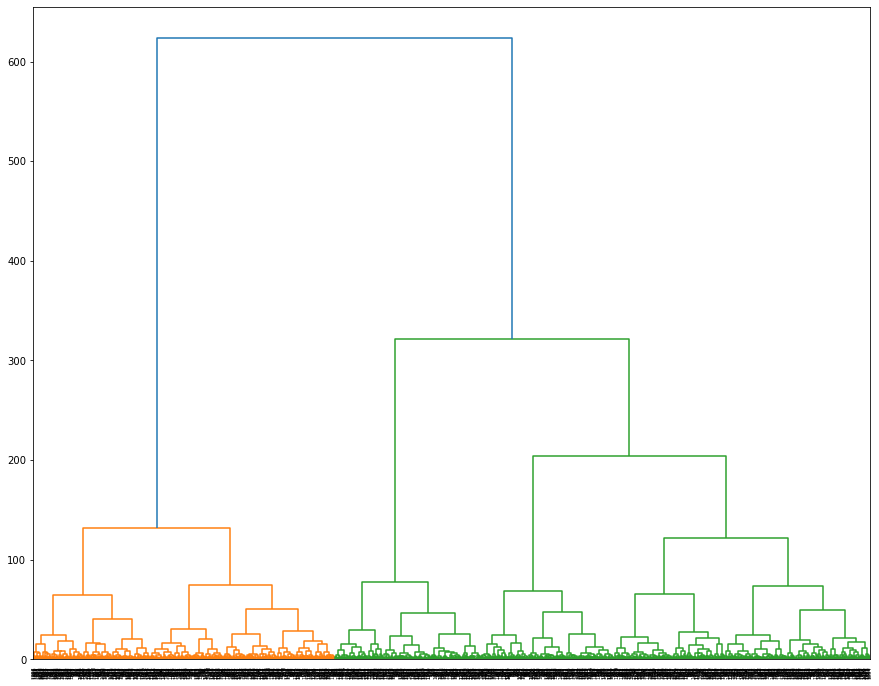

In [52]:
plt.figure(figsize=(15,12))
dendrogram= sch.dendrogram(sch.linkage(points, method='ward'))

In [53]:
hc = AgglomerativeClustering(3)
hc

AgglomerativeClustering(n_clusters=3)

In [54]:
pred = hc.fit_predict(data)
pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [55]:
data['Hierarchical_Cluster'] = pred
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,K_means_Cluster,Hierarchical_Cluster
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0,1,1
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,2,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,1,1
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,2,0


# DBSCAN (Density - Based)

In [56]:
from sklearn.cluster import DBSCAN

In [57]:
dbscan = DBSCAN(3)
dbscan

DBSCAN(eps=3)

In [58]:
model = dbscan.fit_predict(data)
model

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
data['DBSCAN_Cluster'] = model
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,K_means_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0,1,1,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,2,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,1,1,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,2,0,0


# Visualizing Cluster

In [60]:
sb = data[[ 'K_means_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster']]
sb.head()

,K_means_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,1,1,0
1,2,0,0
2,1,1,0
3,1,1,0
4,2,0,0


In [61]:
sb.shape

(1453, 3)

In [62]:
km = sb['K_means_Cluster'].value_counts()
hc = sb['Hierarchical_Cluster'].value_counts()
db = sb['DBSCAN_Cluster'].value_counts()
db

 0    1451
-1       2
Name: DBSCAN_Cluster, dtype: int64

In [63]:
data1 = pd.DataFrame({
    'KM_Cluster' : km.index,
    'K_Means' : km.values
}, columns=['KM_Cluster', 'K_Means'])

data1.set_index('KM_Cluster', inplace=True)

data1

,K_Means
KM_Cluster,
1,547
2,460
0,446


In [64]:
data2 = pd.DataFrame({
    'HC_Cluster' : hc.index,
    'Hierarchial' : hc.values
}, columns=['HC_Cluster', 'Hierarchial'])

data2.set_index('HC_Cluster', inplace=True)
data2

,Hierarchial
HC_Cluster,
0,676
1,524
2,253


In [65]:
data3 = pd.DataFrame({
    'DB_Cluster': db.index,
    'DBSCAN' : db.values
}, columns=['DB_Cluster', 'DBSCAN'])


data3.set_index('DB_Cluster', inplace=True)
data3


,DBSCAN
DB_Cluster,
0,1451
-1,2


In [66]:
result = pd.concat([data1, data2, data3], axis=1)
result.fillna(0, inplace=True)
result

,K_Means,Hierarchial,DBSCAN
-1,0.0,0.0,2.0
0,446.0,676.0,1451.0
1,547.0,524.0,0.0
2,460.0,253.0,0.0


In [67]:
x1 = result.index
y1=result['K_Means']

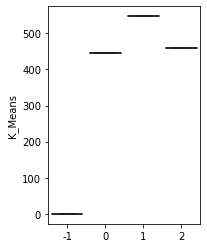

In [70]:
plt.subplot(1,2,1)
sns.boxplot(x=x1, y=y1, palette=('cubehelix'))
plt.show()